In [ ]:
#Importing all necessary libraries for project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras import Input
from sklearn.metrics import precision_score, recall_score

In [ ]:
df = pd.read_csv("/Users/Vlahonator/Downloads/higgs-boson/training.zip")
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000000,162499.750000,224999.500000,287499.250000,349999.000000
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000000,-999.000000,-999.000000,0.490000,8.503000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000


In [ ]:
# drop columns we dont want
ndf = df.drop('EventId', axis=1)

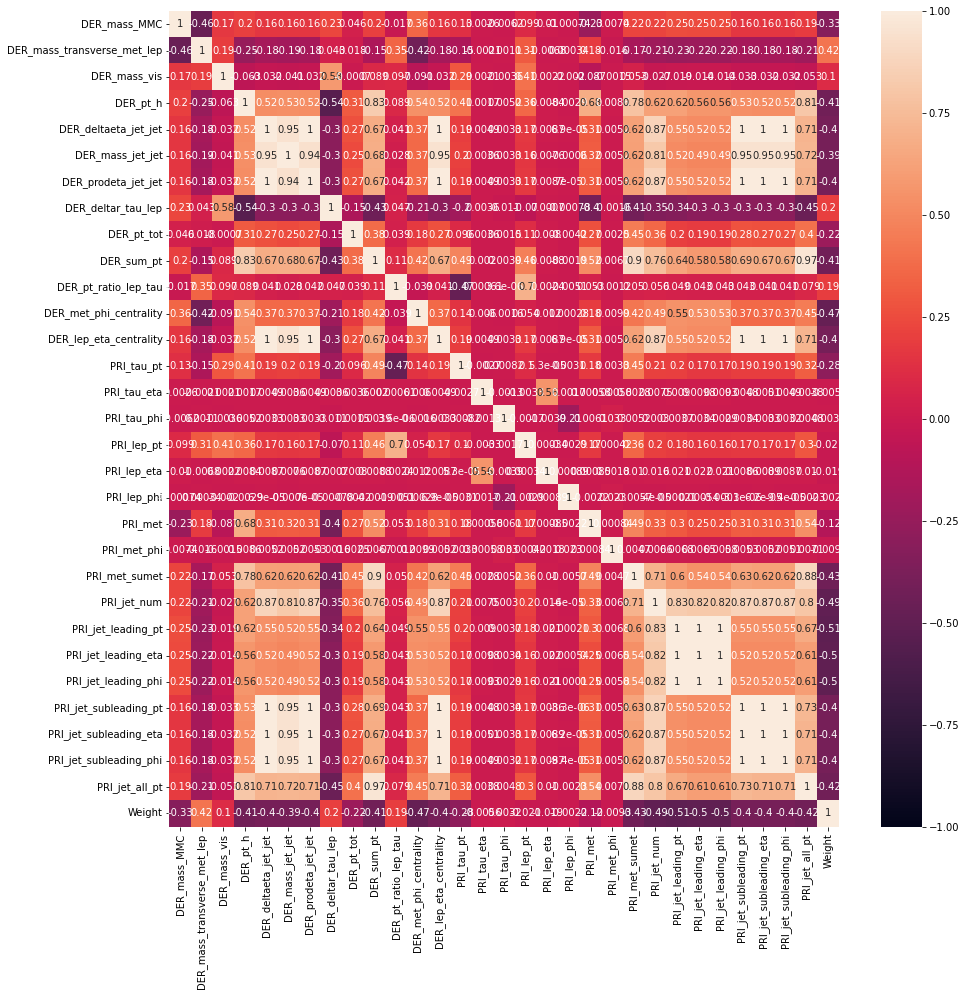

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(ndf.corr(), annot=True, vmin=-1, vmax=+1)
plt.show()

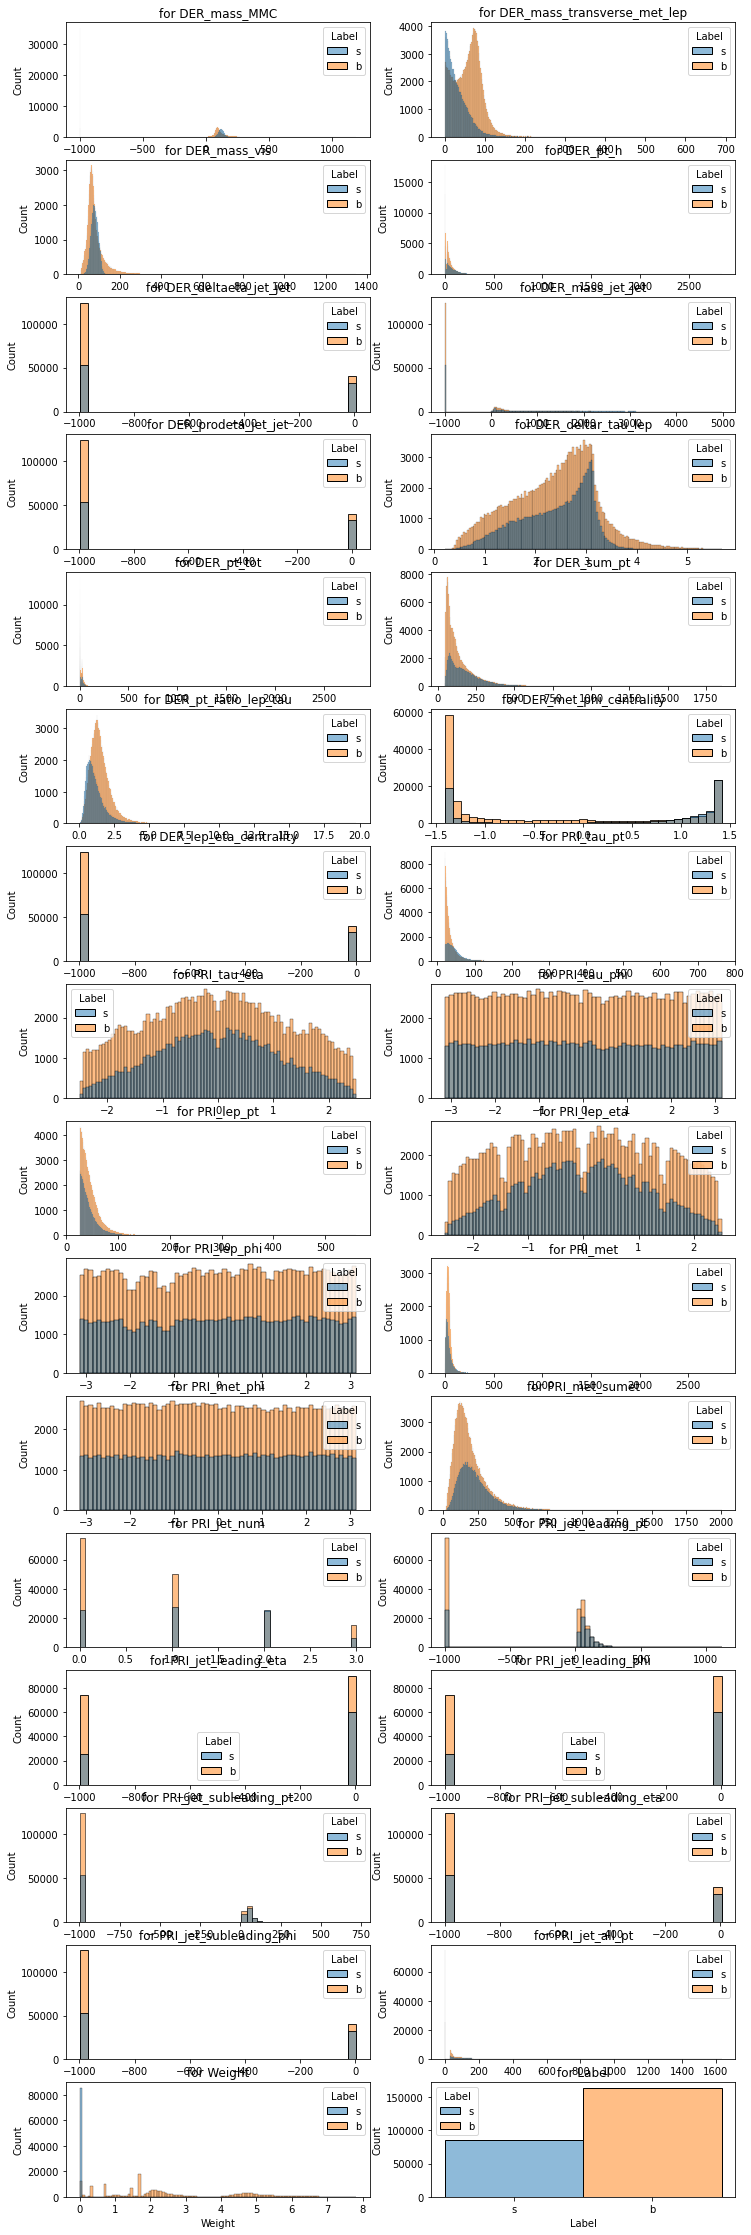

In [ ]:
# box plot for each categorical variable
plt.figure(figsize=(12,40))
for i,col in enumerate(ndf.columns.to_list()):
    plt.subplot(16,2,i+1)
    sns.histplot(x=col, hue='Label',data=ndf)
    plt.title(f"for {col}")
plt.show()

- Columns to remove in feature set:
`DER_mass_jet_jet`, `DER_prodeta_jet_jet`,`PRI_jet_subleading_eta`,`PRI_jet_subleading_phi`,`DER_lep_eta_centrality`,`PRI_lep_phi`,`PRI_met_phi`
- Few of the colums seem to be significant to predict target variable
- target variable is moderatly imbalanced

In [ ]:
# removing multicollinear columns
columns = ['DER_mass_jet_jet','DER_prodeta_jet_jet',
           'PRI_jet_subleading_eta','PRI_jet_subleading_phi',
           'DER_lep_eta_centrality','PRI_lep_phi','PRI_met_phi','PRI_met_sumet']
new_df = ndf.drop(columns=columns, axis=1)

# percentage of values in target variable
new_df['Label'].value_counts().map(lambda x: x/sum(new_df['Label'].value_counts().values))

b    0.657332
s    0.342668
Name: Label, dtype: float64

In [ ]:
# removing 20000 samples of back-ground label to downsize the dataset
b_df = new_df[new_df['Label'] == 'b' ].sample(20000)
mdf = new_df.drop(b_df.index, axis=0)
mdf['Label'] = mdf['Label'].map({'b':0,
                                 's':1})
mdf['Label'].value_counts()

0    144333
1     85667
Name: Label, dtype: int64

In [ ]:
# train and test split as well as standardize the data
def train_test_func(df):
    # train and test split
    X = df.drop('Label', axis=1)
    y = df['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # scale the dataset
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_func(mdf)
y_train.value_counts(), y_test.value_counts()

(0    115559
 1     68441
 Name: Label, dtype: int64, 0    28774
 1    17226
 Name: Label, dtype: int64)

In [ ]:
X_train.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_met', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_all_pt',
       'Weight'],
      dtype='object')

## Neural Net modeling using keras functional API

In [ ]:
# NN baseline using functional API
input_dim = Input(shape=(23,), dtype='float64')
dense_layer01 = layers.Dense(400, activation='relu')(input_dim)
dense_layer02 = layers.Dense(350, activation='relu')(dense_layer01)
dense_layer03 = layers.Dense(300, activation='relu')(dense_layer02)
output = layers.Dense(1, activation='sigmoid')(dense_layer03)

# model instance
model = Model(inputs=input_dim, outputs=output)

# metrics to measure
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')]


# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)

# callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

EPOCHS=30
BATCH_SIZE=128

In [ ]:
history = model.fit(X_train,y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

Epoch 1/30
1438/1438 [==============================] - 23s 15ms/step - loss: 0.1089 - precision: 0.9278 - recall: 0.9608 - auc: 0.9911 - val_loss: 0.0788 - val_precision: 0.9392 - val_recall: 0.9857 - val_auc: 0.9956
Epoch 2/30
1438/1438 [==============================] - 17s 12ms/step - loss: 0.0759 - precision: 0.9491 - recall: 0.9747 - auc: 0.9953 - val_loss: 0.0641 - val_precision: 0.9392 - val_recall: 0.9953 - val_auc: 0.9974
Epoch 3/30
1438/1438 [==============================] - 17s 12ms/step - loss: 0.0593 - precision: 0.9616 - recall: 0.9796 - auc: 0.9970 - val_loss: 0.1157 - val_precision: 0.9651 - val_recall: 0.9081 - val_auc: 0.9937
Epoch 4/30
1438/1438 [==============================] - 18s 12ms/step - loss: 0.0470 - precision: 0.9705 - recall: 0.9839 - auc: 0.9980 - val_loss: 0.0287 - val_precision: 0.9776 - val_recall: 0.9950 - val_auc: 0.9994
Epoch 5/30
1438/1438 [==============================] - 18s 12ms/step - loss: 0.0375 - precision: 0.9773 - recall: 0.9871 - auc:

## Metrics

In [ ]:
# test of test dataset
prediction = model.predict(X_test)
pred = pd.Series(prediction.flatten()).apply(lambda x: 1 if x >=0.50 else 0)

# precision and recall score
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(f"precision score on test dataset {precision}")
print(f"recall score on test dataset {recall}")

1438/1438 [==============================] - 4s 3ms/step
precision score on test dataset 0.9975615420343706
recall score on test dataset 0.9974457215836526
